<b><em> Load all the required libraries <b/>

In [2]:
import pandas as pd
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('haberman.csv')

In [4]:
df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [5]:
df[df['age']==df['age'].max()]

,age,year,nodes,status
305,83,58,2,2


 Understanding Of Dataset
 
 * Age - age of the person at the time of operation.
 * Year - patient's year of operation.
 * Nodes - Number of positive Axillary nodes detected.Implies whether cancer affected the lymph node,if it is positive node cancer has been          spread to lymph nodes.
 * Status - 1 = the patient survived 5 years or longer, 
 2 = the patient died within 5 year.

<b><i> Check for null values

In [6]:
df.isnull().values.any()

False

There are no missing values.

###  Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.

In [7]:
df.shape

(306, 4)

There are 306 rows and 4 columns(features) in the dataframe.

***Name of the column's***

In [8]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Observation:

1) We have 306 Data points.

2) There are 4 features

3) All the features are of type int.

4) There are no null values in dataset.

Operation for cancer happens in year 1900, hence add 1900 to each Operation year for readability purpose.
Also, replacing survival status values into better readability.

In [10]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

There are 225 people who survied 5 yeras or more & 81 people died less than 5 years

In [11]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1




**Observation**
- The 'status' column is an integer value that needs to be converted into categorical values like "Survived more than 5 years" and "Survived less than 5 years". These categorical values gives us better understanding about the dataset.


In [12]:
df.loc[df['status'] == 1, 'status'] = "Survived more than 5 years"

df.loc[df['status'] == 2, 'status'] = "Survived less than 5 years"
df

,age,year,nodes,status
0,30,64,1,Survived more than 5 years
1,30,62,3,Survived more than 5 years
2,30,65,0,Survived more than 5 years
3,31,59,2,Survived more than 5 years
4,31,65,4,Survived more than 5 years
...,...,...,...,...
301,75,62,1,Survived more than 5 years
302,76,67,0,Survived more than 5 years
303,77,65,3,Survived more than 5 years
304,78,65,1,Survived less than 5 years


<h4>Rename the column names of the dataset

In [13]:
df_columns = df.rename(columns = {'age': 'Age', 'year': 'Year', 'nodes': 'Auxiliary_Lymph_Nodes', 'status': 'Survival_Status'})
print(df_columns)

     Age  Year  Auxiliary_Lymph_Nodes             Survival_Status
0     30    64                      1  Survived more than 5 years
1     30    62                      3  Survived more than 5 years
2     30    65                      0  Survived more than 5 years
3     31    59                      2  Survived more than 5 years
4     31    65                      4  Survived more than 5 years
..   ...   ...                    ...                         ...
301   75    62                      1  Survived more than 5 years
302   76    67                      0  Survived more than 5 years
303   77    65                      3  Survived more than 5 years
304   78    65                      1  Survived less than 5 years
305   83    58                      2  Survived less than 5 years

[306 rows x 4 columns]


### Exploratory Data Analysis
1. Univariate analysis - PDF, CDF, Boxplot, ViolinPlot
2. Bivariate Analysis - Pair Plot, Scatter Plot
3. Multivariate Analysis - Contours

<b>1-D scatter plot

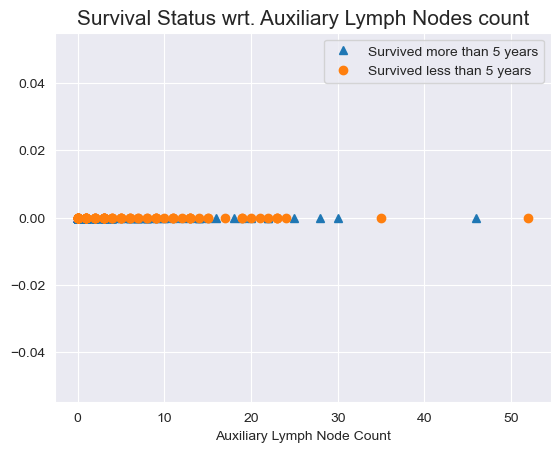

In [14]:
sns.set_style("darkgrid")

survived_longer=df.loc[df["status"] =="Survived more than 5 years"]
survived_less = df.loc[df["status"] == "Survived less than 5 years"]

plt.plot(survived_longer["nodes"],np.zeros_like(survived_longer["nodes"]),'^')

plt.plot(survived_less["nodes"],np.zeros_like(survived_less["nodes"]),'o')

plt.xlabel('Auxiliary Lymph Node Count')

plt.legend(["Survived more than 5 years","Survived less than 5 years"])

plt.title('Survival Status wrt. Auxiliary Lymph Nodes count', size = 15)

plt.show()

<b>Observation:</b>
Lot of points are overlapped so it's unable to see things clearly.

Survived more than 5 years    225
Survived less than 5 years     81
Name: status, dtype: int64


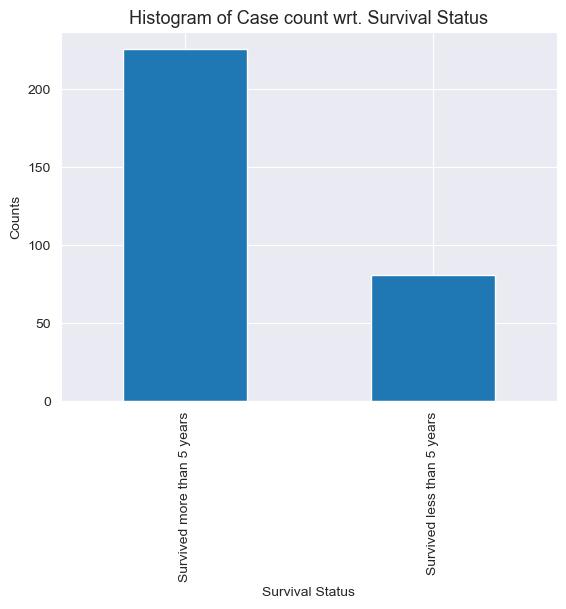

In [15]:
count_classes = pd.value_counts(df['status'])
print(count_classes)
count_classes.plot(kind = 'bar')
#plt.bar(df.index,df['status'])

plt.xlabel('Survival Status')
plt.ylabel('Counts')

plt.title('Histogram of Case count wrt. Survival Status', size = 13)

plt.show()

<h4>Probability Density Function(PDF)</h4>

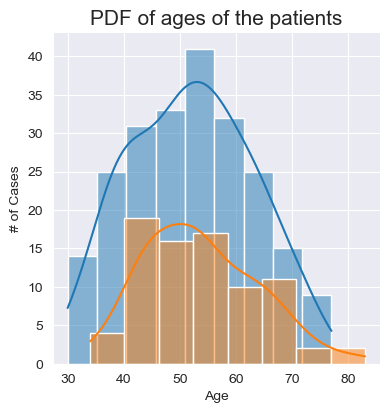

In [16]:
a=sns.FacetGrid(df,hue='status',height=4)
a.map(sns.histplot, "age", kde = True)

plt.xlabel('Age')
plt.ylabel('# of Cases')

plt.title('PDF of ages of the patients', size = 15)
#a.add_legend()
plt.show();

- Age group from 40 to 70 have nearly similar survival rate , so we need to do further analysis

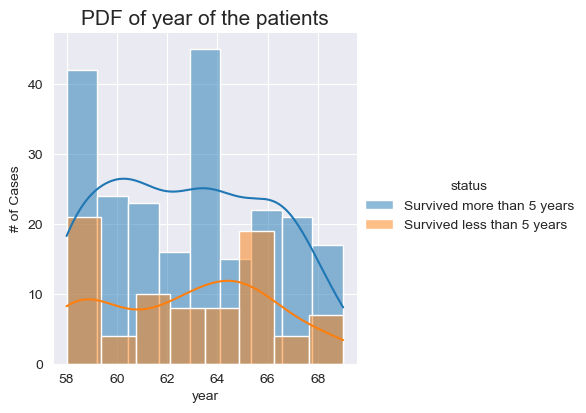

In [17]:
b=sns.FacetGrid(df,hue='status',height=4)
b.map(sns.histplot, "year", kde = True)

plt.xlabel('year')
plt.ylabel('# of Cases')

plt.title('PDF of year of the patients', size = 15)
b.add_legend()
plt.show();

In [18]:
year_group = df.groupby('year')     #grouping row's having the same year 
year_group

In [19]:
for i in year_group:
    print(i)

(58,      age  year  nodes                      status
5     33    58     10  Survived more than 5 years
9     34    58     30  Survived more than 5 years
20    37    58      0  Survived more than 5 years
37    39    58      0  Survived more than 5 years
40    40    58      2  Survived more than 5 years
41    40    58      0  Survived more than 5 years
46    41    58      0  Survived more than 5 years
55    42    58      0  Survived more than 5 years
62    43    58     52  Survived less than 5 years
74    44    58      9  Survived less than 5 years
89    46    58      2  Survived less than 5 years
94    46    58      3  Survived more than 5 years
103   47    58      3  Survived more than 5 years
107   48    58     11  Survived less than 5 years
108   48    58     11  Survived less than 5 years
130   50    58      1  Survived more than 5 years
156   53    58      4  Survived less than 5 years
162   53    58      1  Survived more than 5 years
178   54    58      1  Survived more than 5 y

In [20]:
df_grp=year_group['status'].value_counts()
df_grp

year  status                    
58    Survived more than 5 years    24
      Survived less than 5 years    12
59    Survived more than 5 years    18
      Survived less than 5 years     9
60    Survived more than 5 years    24
      Survived less than 5 years     4
61    Survived more than 5 years    23
      Survived less than 5 years     3
62    Survived more than 5 years    16
      Survived less than 5 years     7
63    Survived more than 5 years    22
      Survived less than 5 years     8
64    Survived more than 5 years    23
      Survived less than 5 years     8
65    Survived more than 5 years    15
      Survived less than 5 years    13
66    Survived more than 5 years    22
      Survived less than 5 years     6
67    Survived more than 5 years    21
      Survived less than 5 years     4
68    Survived more than 5 years    10
      Survived less than 5 years     3
69    Survived more than 5 years     7
      Survived less than 5 years     4
Name: status, dtype: int64

<b><u><i>Observation</i></u></b>:
- A good number of cases survived in the year 1958 and 1964.
- But this curve has a uniform density and doesn't gives any insight so we cannot use it for further analysis.

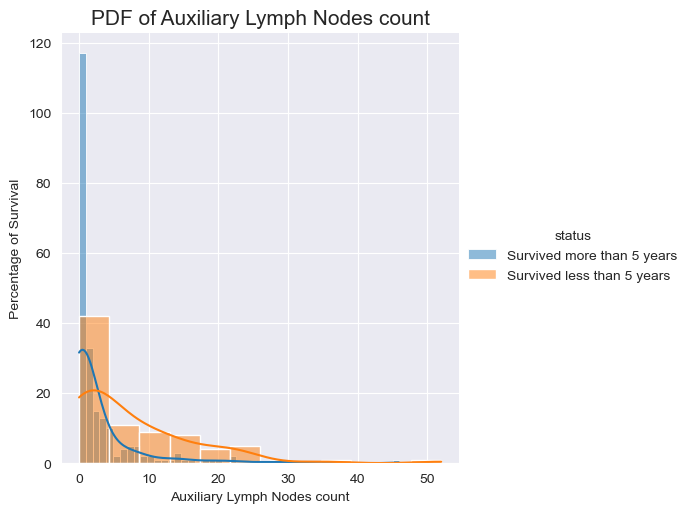

In [21]:
sns.FacetGrid(df, hue ="status", height = 5)\
    .map(sns.histplot, "nodes", kde = True) \
    .add_legend()

plt.xlabel('Auxiliary Lymph Nodes count')
plt.ylabel('Percentage of Survival')

plt.title('PDF of Auxiliary Lymph Nodes count', size = 15)

plt.show();

<b><u><i>Observation</i></u></b>:
- If the number of nodes is 0 then patient survives more than 5 years.
- If the number of nodes is less than or equal to 3 the patient has a high chance of survival of more than 5 years.
- As the no of lymph nodes affected increases, the overall survival rate drops
- If the lymph nodes affected were more than 30 in numbers survival rate drops to almost zero. 

<b> PDF and CDF </b>

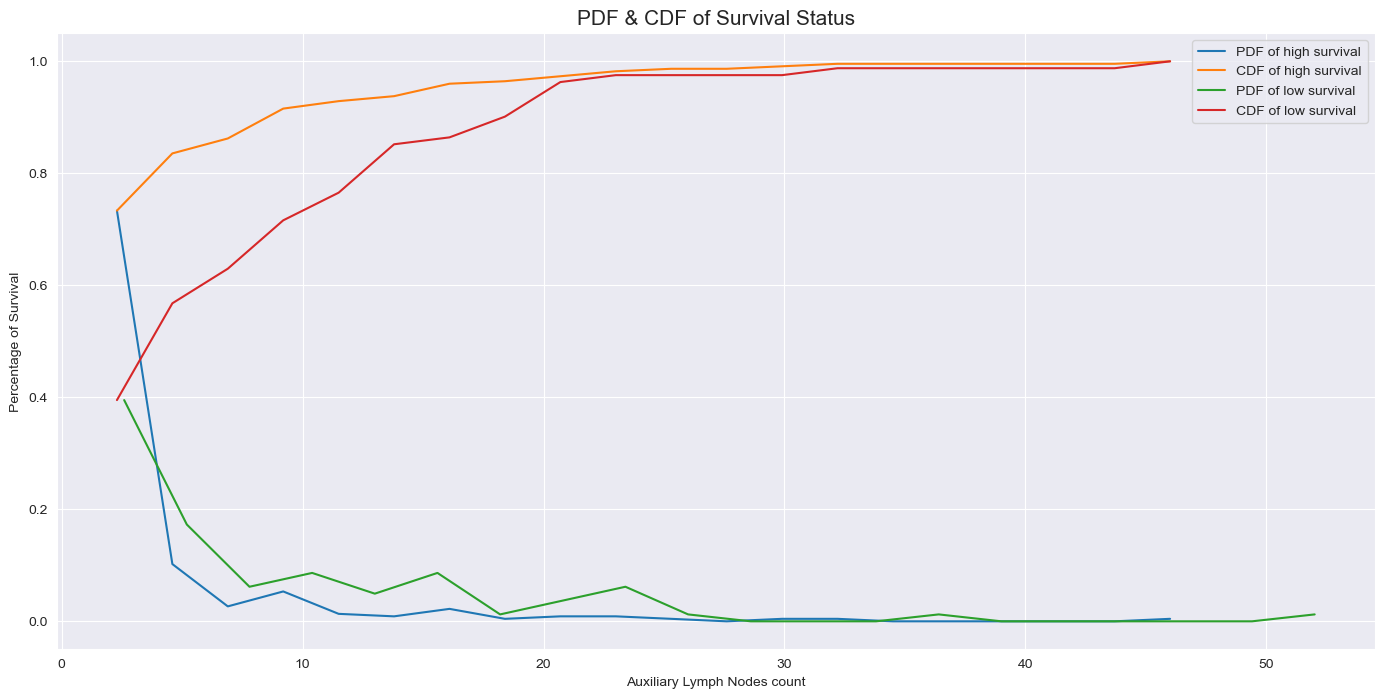

In [22]:
olderr = np.seterr(all='ignore')

counts, bin_edges = np.histogram(survived_longer['nodes'], bins = 20, density = True)
count1, bins1 = np.histogram(survived_less['nodes'], bins = 20, density = True)

pdf = counts / sum(counts)
pdf_less = count1 / sum(count1)

plt.figure(figsize = (17,8))

cdf = np.cumsum(pdf)
cdf_less = np.cumsum(pdf_less)

plt.plot(bin_edges[1:],pdf,label='PDF of high survival') # PDF of high survival
plt.plot(bin_edges[1:],cdf,label='CDF of high survival') # CDF of high survival


plt.plot(bins1[1:],pdf_less,label='PDF of low survival') # PDF of low survival
plt.plot(bin_edges[1:],cdf_less,label='CDF of low survival') # CDF of low survival

plt.xlabel('Auxiliary Lymph Nodes count')
plt.ylabel('Percentage of Survival')

plt.title('PDF & CDF of Survival Status', size = 15)
plt.legend()
plt.show()

<b>Observation</b>
- There is nearly 75% chance of high survival of more than 5 years if the number of nodes detected is less than 3.
- There is 100% chance of low survival if the number of nodes is greater than 45.
- 38% of the people having less than 5 nodes have low chances of survival of less than 5 years.

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


<b> Scatter plot </b>

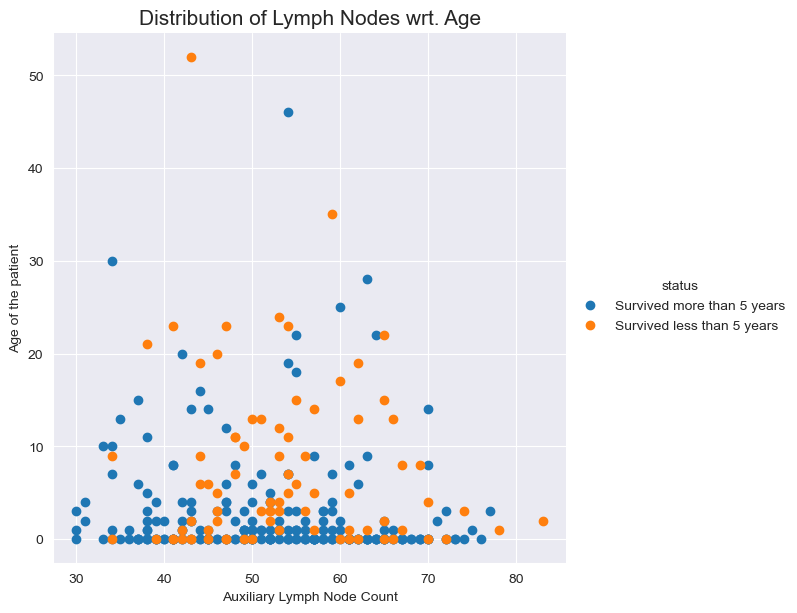

In [23]:
sns.FacetGrid(df, hue = "status", height = 6)\
.map(plt.scatter, "age", "nodes")\
.add_legend()

plt.xlabel('Auxiliary Lymph Node Count')
plt.ylabel('Age of the patient')

plt.title('Distribution of Lymph Nodes wrt. Age', size = 15)

plt.show()

<b>Observation:</b>
- People who are aged less than 35 year's of age have relatively less numbers of lymph nodes affected

<b> Pair plot </b>

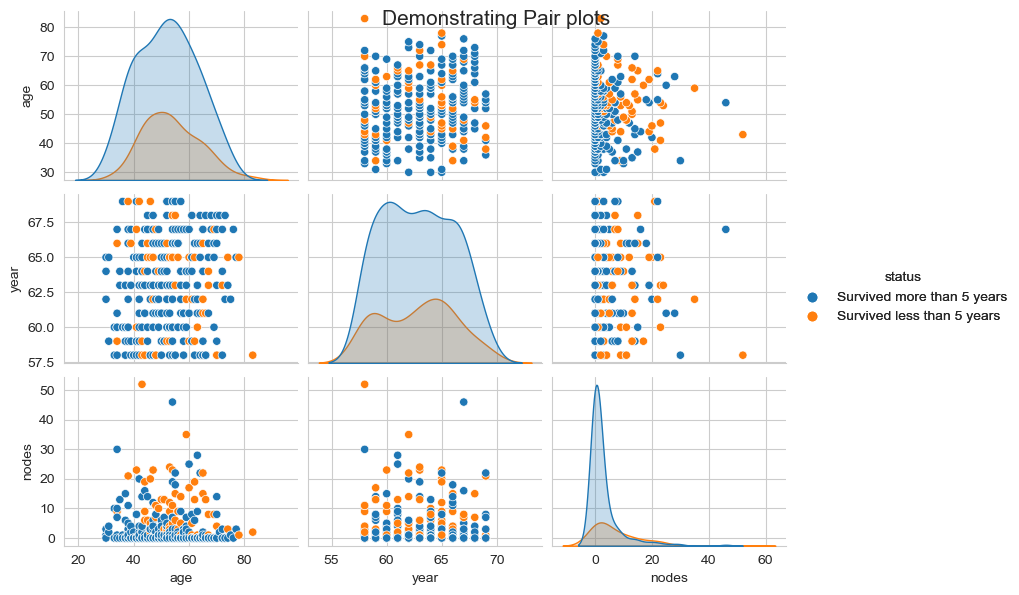

In [24]:
sns.set_style("whitegrid")
sns.pairplot(df, hue = 'status', diag_kind = 'kde', height = 2).add_legend()

plt.suptitle('Demonstrating Pair plots', size = 15)

plt.show()

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

<h4>Mean and Standard Deviation</h4>

In [25]:
print("Mean of number of nodes for people who survived more than 5 years is: {}".format(np.mean(survived_longer.nodes)))
print("STD of number of nodes for people who survived more than 5 years is: {}\n".format(np.std(survived_longer.nodes)))

print("Mean of number of nodes for people who survived less than 5 years is: {}".format(np.mean(survived_less.nodes)))
print("STD of number of nodes for people who survived less than 5 years is: {}".format(np.std(survived_less.nodes)))

Mean of number of nodes for people who survived more than 5 years is: 2.7911111111111113
STD of number of nodes for people who survived more than 5 years is: 5.857258449412131

Mean of number of nodes for people who survived less than 5 years is: 7.45679012345679
STD of number of nodes for people who survived less than 5 years is: 9.128776076761632


<b>Observation</b>
- The spread of data in number of people who survived more than 5 years is less than the number of people who survived less than 5 years

- The mean of number of nodes for people who survived more than 5 years is low whereas the mean of number of nodes for people who survived more than 5 years is high.

<b>Medians and Percentiles</b>

In [26]:
print("Median of number of nodes for people who survived more than 5 years is: {}".format(np.median(survived_longer.nodes)))

print("Median of number of nodes for people who survived less than 5 years is: {}".format(np.median(survived_less.nodes)))

Median of number of nodes for people who survived more than 5 years is: 0.0
Median of number of nodes for people who survived less than 5 years is: 4.0


<b>Observation:</b>
- The median for patients who survived longer is 0 and for those who survived low is 4.

In [27]:
print('In the array 1st,2nd,3rd and 4th values are 0th ,25th,50th,75th percentiles\n')
print("Percentiles of long survival are ",format(np.percentile(survived_longer.nodes,np.arange(0,100,25))))
print("Percentiles of low survival are ",format(np.percentile(survived_less.nodes,np.arange(0,100,25))))

In the array 1st,2nd,3rd and 4th values are 0th ,25th,50th,75th percentiles

Percentiles of long survival are  [0. 0. 0. 3.]
Percentiles of low survival are  [ 0.  1.  4. 11.]


<b><u><i>Observation</i></u></b>

- Nearly 50th% of nodes in long survival cases are 0 and 75th% is more than 3 indicating that remanining the 25th% have more than 3 Auxiliary nodes and only 25 percentage of the people have more than 3 nodes 
- 75th% of data in low survival cases have 11 nodes detected
- So if more nodes are present in peoplw who survived less than 5 years 

<b>Box plots</b>

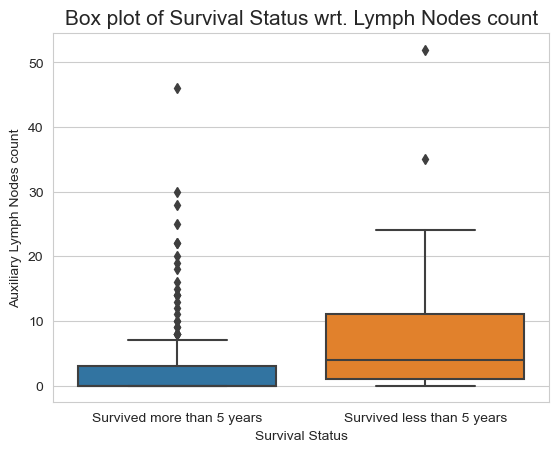

In [28]:
sns.boxplot(x = "status", y = "nodes", data = df)

plt.xlabel('Survival Status')
plt.ylabel('Auxiliary Lymph Nodes count')

plt.title('Box plot of Survival Status wrt. Lymph Nodes count', size = 15)

plt.show()

<b>Observation:
- 75th percentile value of Lymph Nodes count is less for the patients who survived more than 5 years when compared to less than 5 years

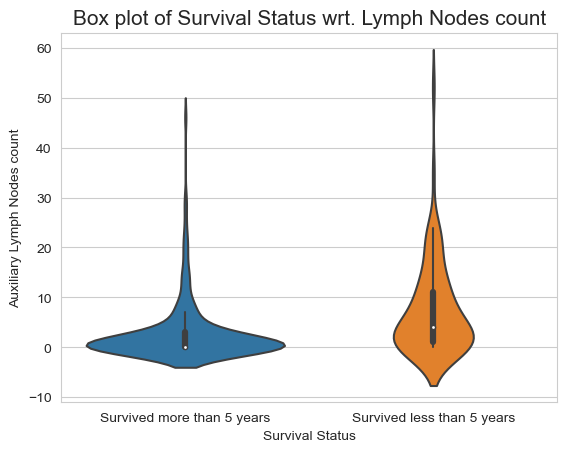

In [29]:
sns.violinplot(x = "status", y = "nodes", data = df)

plt.xlabel('Survival Status')
plt.ylabel('Auxiliary Lymph Nodes count')

plt.title('Box plot of Survival Status wrt. Lymph Nodes count', size = 15)

plt.show()

<b>Observation:
- Number of observation for Auxiliary Lymph Nodes count is more near 0 for longer survivers and it decreases steeply after that
- For low survivers observation for Auxiliary Lymph Nodes count is relatively less and decreases gradually.